# Imports

In [ ]:
# -*- coding: utf8

from scipy import stats as ss
from numpy.testing import assert_equal

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [ ]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [ ]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Lista 07 - Regressão Linear Simples

## Introdução

Antes de iniciar o nosso estudo da regressão, vamos pensar em um modelo que tenta capturar o valor médio no eixo y. Para uma base de dados unidimensional (apenas Y), a média ($\bar{y}$) é um bom estimador. Isto é, imagine que você está em uma sala de aula e entra um novo aluno na sala. Posso prever alguma característica deste aluno (por exemplo, o seu rendimento escolar) usando a média dos outros alunos em sala de aula. 

Agora, como podemos proceder quando temos duas variáveis X e Y? Podemos usar a função de correlação para medir a força da relação linear entre duas variáveis. Para a maioria das aplicações, saber que esse relacionamento linear existe não é suficiente. Queremos ser capazes de entender a natureza do relacionamento. É aqui que vamos usar a regressão linear simples.

Vamos olhar para uma das bases dados que ajudaram a criar a regressão linear.

## Poor Person's KNN  (Vizinhos Próximos Implementado de Forma Simples)

Vamos iniciar com a base de dados original analisada por [Galton](https://en.wikipedia.org/wiki/Francis_Galton). Tal base captura altura de um filho, após alguns anos, com base na altura média dos pais. O problema sendo estudado era prever qual vai ser a altura futura de uma criança usando apenas a altura dos pais como entrada. Como temos um pai e uma mãe, usamos a média das alturas entre os dois. Então temos que:

1. X é a altura média dos pais
1. Y é a altura da criança após alguns anos (o mesmo número de anos para toda criança)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/galton.csv', index_col=0)
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,001,78.5,67.0,75.43,4,1,male,73.2
2,001,78.5,67.0,75.43,4,2,female,69.2
3,001,78.5,67.0,75.43,4,3,female,69.0
4,001,78.5,67.0,75.43,4,4,female,69.0
5,002,75.5,66.5,73.66,4,1,male,73.5


Abaixo temos a dispersão dos dados

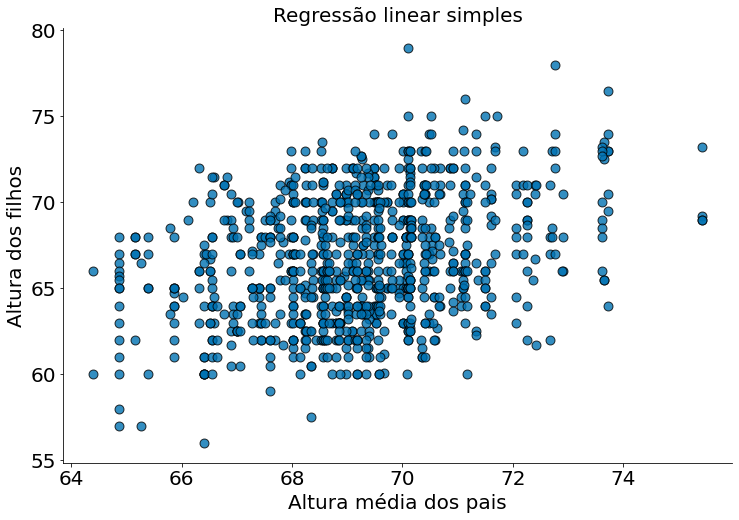

In [ ]:
x = df['midparentHeight'].values
y = df['childHeight'].values

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.xlabel('Altura média dos pais')
plt.ylabel('Altura dos filhos')
plt.title('Regressão linear simples')
despine()

Uma forma de capturar a correlação é fazer uma regressão de vizinhos próximos (nearest neighbors). Para tal, precisamos agrupar, no eixo-x, pontos próximos um dos outros. É possível fazer o mesmo nos eixos x e y usando uma distância euclideana. Por simplicidade vamos agrupar apenas em x. No caso particular destes dados onde os valores são bem espalhados no eixo x, podemos simplesmente arredondar os números

In [ ]:
copy = df[['midparentHeight', 'childHeight']].copy()
copy['midparentHeight'] = copy['midparentHeight'].round()

Agrupar por x e tirar a média de y.

In [ ]:
model = copy.groupby('midparentHeight').mean()
model.head()

,childHeight
midparentHeight,
64.0,63.000000
65.0,64.229630
66.0,64.350000
67.0,65.535632
68.0,66.240458


Observando o modelo:

Text(0.5, 1.0, 'Regressão linear simples')

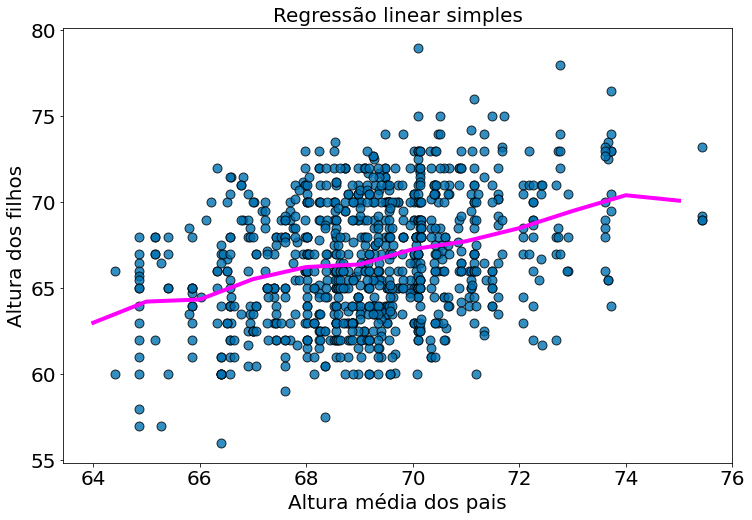

In [ ]:
x_nn = model.index
y_nn = model.values
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x_nn, y_nn, color='magenta')
plt.xlabel('Altura média dos pais')
plt.ylabel('Altura dos filhos')
plt.title('Regressão linear simples')

Previsão: Para um novo ponto, arredondar seu peso. Ver valor de y_nn

In [ ]:
altura_media_pais = 71
model.loc[71.0]

childHeight    67.740594
Name: 71.0, dtype: float64

Observe que o modelo acima é muito perto de uma reta. Este é um dos pontos e partidas para entender a correlação linear. Precisamos de alguma forma:

1. Capturar a média de valores próximos um dos outros em x
1. Capturar a média de valores próximos um dos outros em y

Resolvemos o (1) problema nos dados acima com um round. No caso (2) com um groupby e mean. Observe como o modelo é quase o mesmo quando z-normalizamos os dados.

In [ ]:
znormed = df[['midparentHeight', 'childHeight']].copy()
znormed = (znormed - znormed.mean()) / znormed.std(ddof=1)
znormed.head()

,midparentHeight,childHeight
1,3.452802,1.803190
2,3.452802,0.685637
3,3.452802,0.629760
4,3.452802,0.629760
5,2.470762,1.887006


In [ ]:
x = znormed['midparentHeight'].copy()
y = znormed['childHeight'].copy()

In [ ]:
znormed['midparentHeight'] = znormed['midparentHeight'].round()
model = znormed.groupby('midparentHeight').mean()

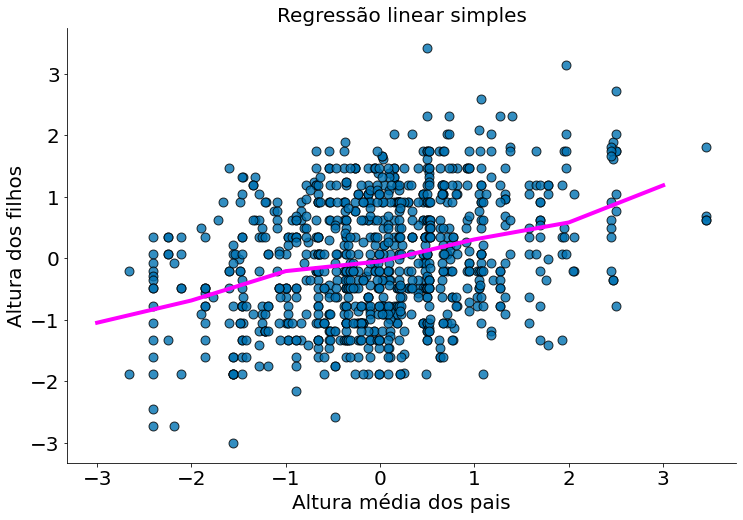

In [ ]:
x_nn = model.index
y_nn = model.values
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x_nn, y_nn, color='magenta')
plt.xlabel('Altura média dos pais')
plt.ylabel('Altura dos filhos')
plt.title('Regressão linear simples')
despine()

## Regressão Linear Simples

Nos slides da aula, leia a discussão sobre como uma regressão linear tenta capturar a mesma ideia do nosso KNN simples acima. De forma simples, queremos uma reta possível de explicar tando a dispersão em x quanto em y. Tal reta deve se aproximar da média dos dois valores quando vistos em janelas (estilo o NN acima). Em particular, você supõe que existem constantes $\alpha$ (alfa) e $\beta$ (beta) tais que:

$$\hat{y}_i = \alpha + \beta x_i + \epsilon_i$$

Idealmente, vamos conseguir capturar o valor médio de $y_i$ para grupos de valores próximos em $x_i$. $\epsilon_i$ é um termo de erro (esperançosamente pequeno) que representa o fato de que existem outros fatores não explicados por este modelo simples.

## Exercício 1: Reta

* Supondo que tenhamos determinado $\alpha$, $\beta$ e $x_i$, implemente uma função que recebe como parâmetro os valores de $\alpha$, $\beta$ e $x_i$ e retorna o valor predito, $\hat{y}_i$. 



In [ ]:
alpha = 1.5
beta = 0.8
x = 10

def predict(alpha, beta, x_i):
  # deve retornar o valor predito de y
  return alpha + beta*x_i

In [ ]:
foo = predict(alpha, beta, x)
assert_equal(foo, 9.5)

## Exercício 2: Erro

Como escolhemos alfa e beta?  
Bem, qualquer escolha de alfa e beta nos dá uma saída prevista para cada entrada $x_i$. Como sabemos a saída real $y_i$, podemos calcular o erro de cada par. 

* Para isso, implemente uma função que recebe como parâmetro os valores de $\alpha$, $\beta$, $x$ e $y$ e retorna o erro da saída prevista pelo modelo.

In [ ]:
y = 10.2

def error(alpha, beta, x, y):
  # SEU CODIGO AQUI
  # Deve retornar o erro da saída prevista pelo modelo
  return y - (alpha + beta*x)

In [ ]:
erro = error(alpha, beta, x, y)
assert_equal(round(erro, 2), 0.7)

## Exercício 3: Erro médio

* Voltando ao exemplo que utiliza a base de dados original analisada por Galton, utilize a função de erro implementada e calcule o erro médio do modelo.  
Para isso, considere $\alpha$ = 1 e $\beta$ = 0.5. Além disso, considere $x$ a altura média dos pais e $y$ a altura da criança.

In [ ]:
# definir alpha, beta, x e y fora da funcao
alpha = 1
beta = 0.5
x = df['midparentHeight'].values
y = df['childHeight'].values

def mean_error(alpha, beta, x, y):
  # SEU CODIGO AQUI
  e = error(alpha, beta, x, y)
  return e.mean()

In [ ]:
erro_medio1 = mean_error(alpha, beta, x, y)
assert_equal(round(erro_medio1, 2), 31.14)

* A seguir, mostre o gráfico de dispersão dos dados e a reta gerada pelo modelo. (SEM CORREÇÃO AUTOMÁTICA)

Text(0, 0.5, 'Childs Height')

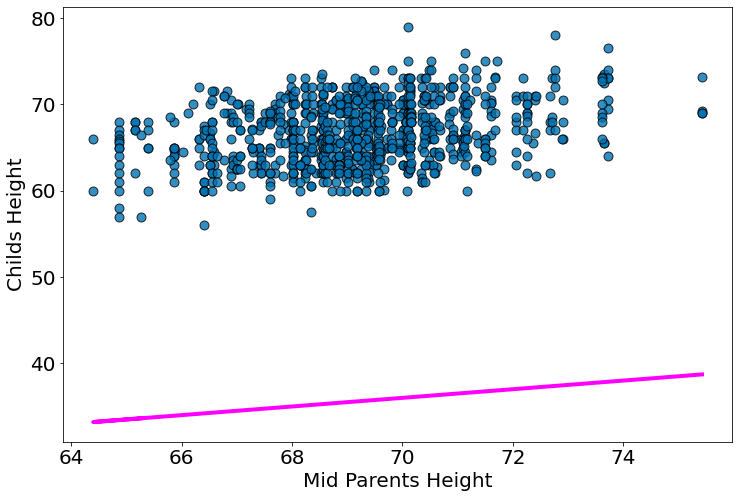

In [ ]:
x = df['midparentHeight'].values
y = df['childHeight'].values
y2 = beta * x + alpha

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y2, color='magenta')
plt.xlabel('Mid Parents Height')
plt.ylabel('Childs Height')

* Repita o cálculo considerando $\alpha$ = 22 e $\beta$ = 0.5.

In [ ]:
alpha = 22
beta = 0.5


erro_medio2 = mean_error(alpha, beta, x, y)
assert_equal(round(erro_medio2, 2), 10.14)

* A seguir, mostre o gráfico de dispersão dos dados e a reta gerada pelo modelo. (SEM CORREÇÃO AUTOMÁTICA)

Text(0, 0.5, 'Childs Height')

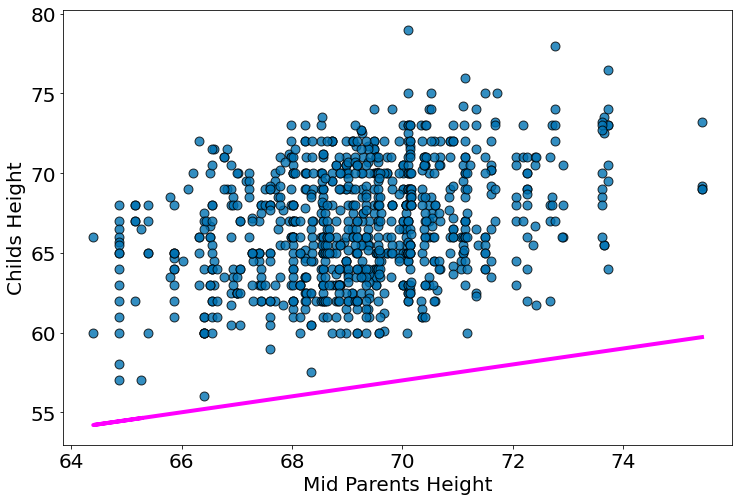

In [ ]:
x = df['midparentHeight'].values
y = df['childHeight'].values

y2 = beta * x + alpha

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y2, color='magenta')
plt.xlabel('Mid Parents Height')
plt.ylabel('Childs Height')

Você deve notar que o segundo modelo é bem melhor. Porém os dois são péssimos.

## Exercício 4: Soma dos erros quadrados

O que realmente gostaríamos de saber é o erro total em todo o conjunto de dados. Mas não queremos apenas adicionar os erros. Se a previsão para $x_1$ for muito alta e a previsão para $x_2$ for muito baixa, os erros podem ser cancelados.  
Então, em vez disso, somamos os erros quadrados. 
* **a)** Para isso, implemente uma função que recebe como parâmetro os valores de $\alpha$, $\beta$, $x$ e $y$ e retorna a soma dos erros quadrados da saída prevista pelo modelo.

In [ ]:
def sum_of_squared_errors(alpha, beta, x, y):
  # SEU CODIGO AQUI
  return (error(alpha, beta, x, y) ** 2).sum()

A *solução de mínimos quadrados (least squares solution)*  é escolher o alfa e o beta que tornam a soma dos erros quadrados a menor possível. Para chegar em tais valores, podemos ver o erro como uma função de $\alpha$, $\beta$. Vamos iniciar com o caso normalizado. Aqui $\alpha=0$.

### Dados Normalizados

Lembre-se que na z-normalização, os dados de X e Y ficam com média 0 e desvio 1. Em particular: $x'_i = \frac{x_i - \bar{x}}{s_x}$ e $y'_i = \frac{y_i - \bar{y}}{s_y}$. Note como a média dos dados tanto em X quanto em Y é zero:

$$\bar{x'} = n^{-1} \sum_i \frac{x_i - \bar{x}}{s_x}$$

$$\bar{x'} = n^{-1} s^{-1}_x (\sum_i x_i - \bar{x} \sum_i 1)$$

$$\bar{x'} = n^{-1} s^{-1}_x (\sum_i x_i - \bar{x} n)$$

$$\bar{x'} = n^{-1} s^{-1}_x (\sum_i x_i - x_i)$$

$$\bar{x'} = n^{-1} s^{-1}_x (0) = 0$$

Além do mais, o desvio padrão é 1. Provando:

$$s_{x'} = n^{-1} \sum_i (\frac{x_i - \bar{x}}{s_x} - 0)^2$$
$$s_{x'} = s^{-1}_x n^{-1} \sum_i (x_i - \bar{x})^2$$
$$s_{x'} = s^{-1}_x s_x = 1$$

Como a média dos pontos é (0, 0), a nossa melhor reta vai passar pela origem. Ou seja, $\alpha=0$. Além do mais,  cada ponto dos seus dados é uma reta entre (0, 0) e o ponto $(x'_i, y'_i)$. Neste caso, resolver o problema abaixo para chegar na equação da reta:

$$L(\beta) = \sum_i (y'_i - \hat{y}'_i)^2$$

$$L(\beta) = \sum_i (y'_i - \beta x'_i)^2$$

$$L(\beta) = \sum_i (y'^2_i - 2 \beta x'_i y'_i + \beta^2 x'^2_i)$$

Derivando a função em $\beta$:

$$\frac{d}{d\beta} L(\Theta) = -\sum_i (2 x'_i y'_i + 2 \beta x'^2_i)$$

Fazendo $\frac{d}{d\beta}=0$:

$$\beta = \frac{\sum_i x'_i y'_i}{\sum_i x'^2_i}$$

Nos slides discutimos como tal solução captura é uma função da covariância dos dados.

### Dados Originais

Agora vamos resolver sem normalizar os dados. Vamos definir $\Theta = [\alpha, \beta]$, isto é, um vetor com alfa e beta.

$$L(\Theta) = \sum_i (y_i - \hat{y}_i)^2$$

$$L(\Theta) = \sum_i (y_i - (\beta x_i + \alpha))^2$$

Resolvendo o quadrado dentro do somatório temos:

$$L(\Theta) = \sum_i (y_i^2 - 2 \beta x_i y_i - 2 \alpha y_i + x_i^2\beta^2 + 2 \beta \alpha x_i + \alpha^2)$$

Derivando em relação a $\alpha$:

$$\frac{d}{d\alpha} L(\Theta)= \sum_i (- 2 y_i + 2 \beta x_i + 2\alpha)$$

Derivando em relação a $\beta$:

$$\frac{d}{d\beta} L(\Theta) = \sum_i (- 2 x_i y_i + 2x_i^2\beta + 2 \alpha x_i)$$

Para resolver otimizar esta função precisamos setar as duas derivadas para zero.

$$\frac{d}{d\alpha} L(\Theta) = 0$$

$$\frac{d}{d\beta} L(\Theta) = 0$$

Após isto, podemos resolver os valores ótimos de $\alpha$ e $\beta$. Note que esta é uma otimização um pouco chata de resolver.

\begin{align}
 \alpha & = \bar{y} - \beta\,\bar{x}, \\[5pt]
  \beta &= \frac{ \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i=1}^n (x_i - \bar{x})^2 } \\[6pt]
            &= \frac{ \operatorname{Cov}(x, y) }{ \operatorname{Var}(x) } \\[5pt]
            &= r_{xy} \frac{s_y}{s_x}. \\[6pt]
\end{align}

Sem passar pela matemática exata, vamos pensar em por que isso pode ser uma solução razoável. A escolha do alfa simplesmente diz que quando vemos o valor médio da variável independente $x$, predizemos o valor médio da variável dependente $y$.

A escolha de beta significa que quando o valor de entrada aumenta pelo desvio padrão de $x$, a previsão de $y$ aumenta pela correlação entre $x$ e $y$ multiplicada pelo desvio padrão de $y$ (`correlationxy * np.std(y)`). No caso em que $x$ e $y$ estão perfeitamente correlacionados, um aumento de um desvio padrão em $x$ resulta em um aumento de um desvio padrão de $y$ na predição. Quando eles são perfeitamente anti-correlacionados, o aumento em $x$ resulta em uma *diminuição* no valor da previsão. E quando a correlação é *zero*, o beta é *zero*, o que significa que as alterações em $x$ não afetam a previsão.

Para um pouco mais sobre a intuição dessa fórmula, veja este [vídeo](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/least-squares-regression/v/calculating-the-equation-of-a-regression-line).
* **b)** Utilizando a derivação mostrada acima, implemente uma função que recebe como parâmetro os valores de $x$ e $y$ e retorne os valores ótimos de $\alpha$ e $\beta$.

In [ ]:
def least_squares_fit(x, y):
    cr = ss.pearsonr(x, y)[0]
    beta = cr * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

* **c)** A seguir, mostre o gráfico de dispersão dos dados e a reta gerada pelo modelo com os parâmetros ótimos (SEM CORREÇÃO AUTOMÁTICA). Quais são os valores ótimos para $\alpha$ e $\beta$ ? (COM CORREÇÃO AUTOMÁTICA)

Text(0.5, 1.0, 'Simple linear regression')

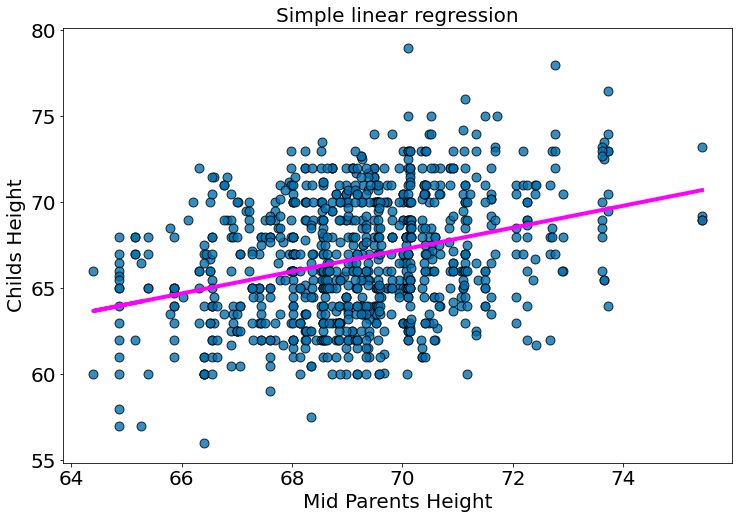

In [ ]:
x = df['midparentHeight'].values
y = df['childHeight'].values
alpha, beta = least_squares_fit(x, y)
y_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y_model, color='magenta')
plt.xlabel('Mid Parents Height')
plt.ylabel('Childs Height')
plt.title('Simple linear regression')

In [ ]:
x = df['midparentHeight'].values
y = df['childHeight'].values

alpha, beta = least_squares_fit(x, y)

assert_equal(round(alpha, 2), 22.64)
assert_equal(round(beta, 2), 0.64)

Os valores de alfa e beta encontrados nos levam a concluir que as crianças vão ser aproximadamente $\alpha$ polegadas maiores do que a $\beta$ da média da altura dos seus pais.

## Exercício 5: R-quadrado

É claro que precisamos de uma maneira melhor de descobrir o quão bem nós ajustamos os dados do que simplesmente encarar o gráfico da regressão. Uma medida comum é o coeficiente de determinação (ou R-quadrado, ou $R^2$, ou R-dois), que mede a fração da variação total na variável dependente ($y$) que é capturada pelo modelo.  

$$R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}$$

* Implemente uma função que recebe como parâmetro os valores de $\alpha$, $\beta$, $x$ e $y$ e retorne o valor do $R^2$. 

In [ ]:
def r_squared(alpha, beta, x, y):
  # SEU CODIGO AQUI
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  (((y - y.mean()) ** 2).sum()))

Utilizando a função implementada, qual o valor do $R^2$ no modelo com os valores ótimos de $\alpha$ e $\beta$ ? 

In [ ]:
R2 = r_squared(alpha, beta, x, y)
assert_equal(round(R2, 4), 0.1030)

Agora, escolhemos o alfa e o beta que minimizaram a soma dos quadrados dos erros de previsão. Um modelo linear que poderíamos ter escolhido é "sempre prever a média de $y$" (correspondendo a `alpha = np.mean(y)` e `beta = 0`), cuja soma dos erros quadrados é exatamente igual a sua soma total de quadrados. Isso significa um $R^2$ de zero, que indica um modelo que (obviamente, neste caso) não funciona melhor do que apenas prever a média.

Claramente, o modelo de mínimos quadrados deve ser pelo menos tão bom quanto esse, o que significa que a soma dos erros quadrados é no máximo a soma total de quadrados, o que significa que o $R^2$ deve ser pelo menos zero. E a soma dos erros quadrados deve ser pelo menos $0$, o que significa que o $R^2$ pode ser no máximo $1$.

Quanto maior for o $R^2$, melhor o nosso modelo se ajusta aos dados. Um $R^2$ próximo de 0 nos diz que o nosso modelo está fraco para ajustar aos dados, e que claramente existem outros fatores em jogo.

Plotar os dados em outra escala pode ser uma boa forma de visualizar a variabilidade nos dados que não é capturada pelo modelo.  
* Para visualizar isso, plote o gráfico de dispersão dos dados e a reta gerada pelo modelo com os parâmetros ótimos. Porém, desta vez, brinque com os limites dos eixos x e y e observe a variabilidade do eixo-y que não é capturada pelo modelo.

(55.0, 80.0)

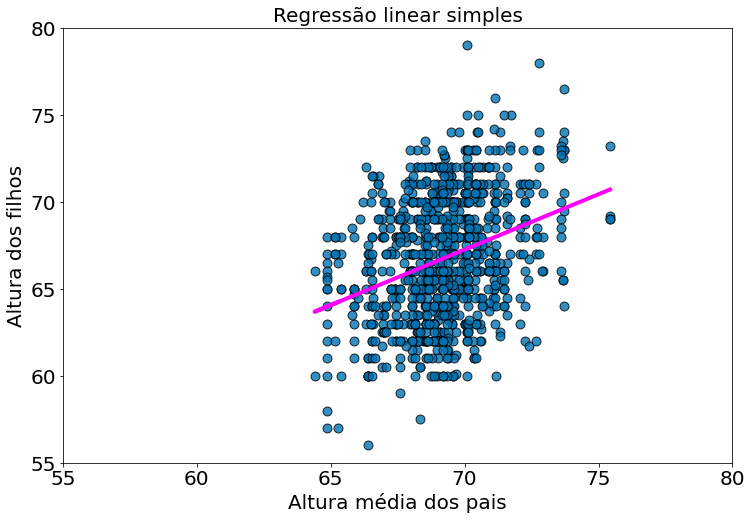

In [ ]:
x = df['midparentHeight'].values
y = df['childHeight'].values
alpha, beta = least_squares_fit(x, y)
y_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y_model, color='magenta')
plt.xlabel('Altura média dos pais')
plt.ylabel('Altura dos filhos')
plt.title('Regressão linear simples')
plt.xlim((55, 80))
plt.ylim((55, 80))

* Por fim, verifique que a raiz de $R^2$ é a própria correlação.

In [ ]:
print(r_squared(alpha, beta, x, y) ** 0.5, ss.pearsonr(x, y)[0])

0.32094989606395935 0.3209498960639593


Existem algumas formas de interpretar o $R^2$:

1. Quão melhor é o meu modelo de um que retorna apenas a média de y.
1. Quanto da variancia de y é explicada por x. 

Para entender o segundo ponto, o `total_sum_of_squares` é proporcional a variância. Na verdade é $s_y$ * (n-1). Ou seja, sem tirar a média dos desvios quadrados. Sendo $\hat{y}_i$ a nossa previsão.

$$R^2 = \sum_i \frac{(y_i - \bar{y})^2 - (y_i - \hat{y}_i)^2}{(y_i - \bar{y})^2}$$

$(y_i - \bar{y})^2$ define nossa variância. Quanto dela está em $(y_i - \hat{y}_i)^2$. Esta é outra forma de pensar no $R^2$.